In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [2]:
"""
Load data set 
"""
iris = datasets.load_iris()
X = iris['data']
Y = iris['target']
m,n = X.shape
k = len(np.unique(Y))
np.random.seed(0)
theta = np.zeros((k,n))

In [3]:
#Convert target vector into one hot vector
def one_hot_y(y):
    Y_one_hot = np.zeros((m,k))
    Y_one_hot[np.arange(m),y] = 1
    return Y_one_hot
y = one_hot_y(Y)
   

In [4]:
#Add bias Term
X_with_bias = np.c_[np.ones(m),X]
theta_init = np.c_[np.zeros(k),theta]

In [69]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_with_bias,y)

In [70]:
#Softmax Function
def softmax(z):
    a = np.exp(z)
    b = np.sum(a,axis = 1,keepdims = True)
    return a / b

In [71]:

def softmax_regression(X,y,theta,alpha):
    cost = []
    reg = 0.1
    for i in range(1001):
        l2_loss = (1/2)*np.sum(np.square(theta[1:]))
        z = np.dot(X,theta.T)
        h = softmax(z)
        J = (-1/m)*np.sum(np.sum(y*np.log(h),axis = 1))+reg*l2_loss
        error = h - y
        grad = (1/m)*(np.dot(X.T,error))
        theta = theta -alpha*grad.T
        if i % 500 == 0:
            print(i, J)
        cost.append(J)
    pred = np.argmax(z,axis = 1)
    
    return theta_init,pred,cost

In [72]:

theta,train_pred , cost = softmax_regression(X_train,y_train,theta_init,0.05)

0 0.8202971755388552
500 0.21176760287778662
1000 0.15561866147288608


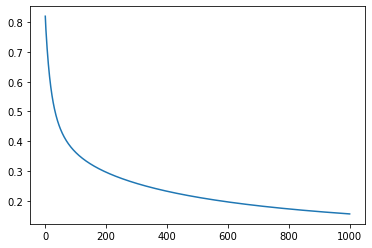

In [73]:
plt.plot(cost)
plt.show()

In [74]:
from sklearn.metrics import accuracy_score
y_train_k = np.argmax(y_train,axis = 1)
acc_train = accuracy_score(y_train_k,train_pred)
acc_train

0.9642857142857143

In [75]:
test_pred = np.argmax(softmax(np.dot(X_test,theta.T)),axis = 1)
y_test_k = np.argmax(y_test,axis = 1)
acc_test = accuracy_score(y_test_k,test_pred)
acc_test

0.2894736842105263

In [76]:
test_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [77]:
y_test_k

array([2, 0, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 0, 2,
       1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1, 0, 2, 0, 0, 1])